In [311]:
import pandas as pd

In [312]:
df = pd.read_csv('city_day.csv')

In [313]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [314]:
df.shape

(29531, 16)

In [315]:
df = df.drop(['Date', 'AQI_Bucket', 'Xylene'], axis = 1)

In [316]:
df = df.drop_duplicates().dropna()
df.shape

(10654, 13)

In [317]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
2010,Aizawl,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,52.0
2011,Aizawl,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,60.0
2012,Aizawl,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,62.0
2013,Aizawl,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,70.0
2014,Aizawl,27.14,35.04,5.63,2.32,8.09,23.98,0.50,4.71,13.02,0.13,0.68,54.0


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10654 entries, 2010 to 29529
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     10654 non-null  object 
 1   PM2.5    10654 non-null  float64
 2   PM10     10654 non-null  float64
 3   NO       10654 non-null  float64
 4   NO2      10654 non-null  float64
 5   NOx      10654 non-null  float64
 6   NH3      10654 non-null  float64
 7   CO       10654 non-null  float64
 8   SO2      10654 non-null  float64
 9   O3       10654 non-null  float64
 10  Benzene  10654 non-null  float64
 11  Toluene  10654 non-null  float64
 12  AQI      10654 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [319]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [320]:
scaler = MinMaxScaler()

In [321]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [322]:
X = df.drop(['City', 'AQI'], axis = 1)
Y = df.AQI

In [323]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [324]:
import catboost


cb = catboost.CatBoostRegressor()

cb.fit(x_train, y_train)

preds_cb = cb.predict(x_test)

Learning rate set to 0.058518
0:	learn: 0.1307678	total: 4.47ms	remaining: 4.47s
1:	learn: 0.1244831	total: 8.1ms	remaining: 4.04s
2:	learn: 0.1186730	total: 11.8ms	remaining: 3.91s
3:	learn: 0.1131333	total: 15.8ms	remaining: 3.94s
4:	learn: 0.1080015	total: 19.4ms	remaining: 3.85s
5:	learn: 0.1029885	total: 23ms	remaining: 3.81s
6:	learn: 0.0984263	total: 26.3ms	remaining: 3.73s
7:	learn: 0.0941100	total: 29.8ms	remaining: 3.69s
8:	learn: 0.0900893	total: 33.3ms	remaining: 3.66s
9:	learn: 0.0863038	total: 36.7ms	remaining: 3.63s
10:	learn: 0.0827843	total: 40.1ms	remaining: 3.61s
11:	learn: 0.0795149	total: 43.4ms	remaining: 3.58s
12:	learn: 0.0763275	total: 46.9ms	remaining: 3.56s
13:	learn: 0.0734676	total: 50.4ms	remaining: 3.55s
14:	learn: 0.0706928	total: 54.2ms	remaining: 3.56s
15:	learn: 0.0681120	total: 57.2ms	remaining: 3.52s
16:	learn: 0.0657234	total: 62.2ms	remaining: 3.59s
17:	learn: 0.0634384	total: 66.6ms	remaining: 3.63s
18:	learn: 0.0613253	total: 71.1ms	remaining: 3

93:	learn: 0.0323546	total: 347ms	remaining: 3.35s
94:	learn: 0.0323170	total: 353ms	remaining: 3.37s
95:	learn: 0.0322763	total: 360ms	remaining: 3.39s
96:	learn: 0.0322317	total: 368ms	remaining: 3.43s
97:	learn: 0.0321866	total: 374ms	remaining: 3.44s
98:	learn: 0.0321528	total: 382ms	remaining: 3.47s
99:	learn: 0.0321094	total: 389ms	remaining: 3.5s
100:	learn: 0.0320621	total: 396ms	remaining: 3.52s
101:	learn: 0.0320157	total: 402ms	remaining: 3.54s
102:	learn: 0.0319808	total: 407ms	remaining: 3.54s
103:	learn: 0.0319480	total: 411ms	remaining: 3.54s
104:	learn: 0.0319182	total: 414ms	remaining: 3.53s
105:	learn: 0.0318702	total: 418ms	remaining: 3.53s
106:	learn: 0.0318224	total: 422ms	remaining: 3.52s
107:	learn: 0.0317855	total: 425ms	remaining: 3.51s
108:	learn: 0.0317557	total: 428ms	remaining: 3.5s
109:	learn: 0.0317265	total: 433ms	remaining: 3.5s
110:	learn: 0.0316835	total: 436ms	remaining: 3.49s
111:	learn: 0.0316517	total: 439ms	remaining: 3.48s
112:	learn: 0.0316333	

In [325]:
from sklearn.metrics import mean_absolute_error, r2_score

def metric(preds, y_test = y_test):
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print(f'MAE = {mae}')
    print(f'r2 = {r2}')

# Тренування на цілому і предікт на цілому

In [326]:
metric(preds_cb)

MAE = 0.01930316749579256
r2 = 0.9474900703517298


In [327]:
import xgboost


xgb = xgboost.XGBRegressor(objective="reg:linear", random_state=42)

xgb.fit(x_test, y_test)

preds_xgb = xgb.predict(x_test)

C:\Users\yura\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:02:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [328]:
metric(preds_xgb)

MAE = 0.0008389945674966525
r2 = 0.9999201042439524


In [329]:
big_cities = ['Delhi', 'Bengaluru', 'Kolkata', 'Hyderabad']

In [330]:
df_big = df[df.City.isin(big_cities)]

In [331]:
X_spec = df_big.drop(['City', 'AQI'], axis = 1)
Y_spec = df_big.AQI

In [332]:
x_spec_train, x_spec_test, y_spec_train, y_spec_test = train_test_split(X_spec, Y_spec, test_size = 0.5, random_state = 42)

In [333]:
preds_cb_spec = cb.predict(x_spec_test)

# Тренування на великих містах і предікт на великих містах

In [334]:
metric(preds_cb_spec, y_spec_test)

MAE = 0.015225649630106183
r2 = 0.9809465613954057


In [335]:
preds_xgb_spec = xgb.predict(x_spec_test)

In [336]:
metric(preds_xgb_spec, y_spec_test)

MAE = 0.02390080525108021
r2 = 0.9349761390494584


In [337]:
df_out = df[~df.City.isin(big_cities)]

In [338]:
df_out.head(5)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
2010,Aizawl,0.044157,0.048263,0.031479,0.007510,0.036336,0.123225,0.018397,0.044604,0.010865,0.000022,0.000176,0.054131
2011,Aizawl,0.054649,0.058330,0.031434,0.005294,0.035380,0.140276,0.018725,0.047637,0.000660,0.000000,0.000000,0.065527
2012,Aizawl,0.061721,0.063539,0.031208,0.006279,0.035756,0.139262,0.018725,0.048522,0.001552,0.000000,0.000000,0.068376
2013,Aizawl,0.047971,0.051238,0.030981,0.001908,0.033197,0.136653,0.015769,0.049785,0.001125,0.000000,0.000000,0.079772
2014,Aizawl,0.038210,0.043719,0.024368,0.013974,0.027602,0.115255,0.016426,0.050796,0.050481,0.000286,0.001495,0.056980


In [339]:
X = df_out.drop(['City', 'AQI'], axis = 1)
Y = df_out.AQI

In [340]:
x_train_out, x_test_out, y_train_out, y_test_out = train_test_split(X, Y, test_size = 0.1, random_state = 42)

# Тренування на маленьких містах і предікт на великих містах

In [341]:
cb.fit(x_train_out, y_train_out)
pred_out = cb.predict(x_test_in)
metric(pred_out, y_test_in)

Learning rate set to 0.051995
0:	learn: 0.0882077	total: 3.87ms	remaining: 3.87s
1:	learn: 0.0846610	total: 8.08ms	remaining: 4.03s
2:	learn: 0.0815014	total: 11.3ms	remaining: 3.77s
3:	learn: 0.0783592	total: 14.2ms	remaining: 3.54s
4:	learn: 0.0754619	total: 17ms	remaining: 3.39s
5:	learn: 0.0726823	total: 20ms	remaining: 3.32s
6:	learn: 0.0700777	total: 24.4ms	remaining: 3.46s
7:	learn: 0.0676739	total: 27.7ms	remaining: 3.43s
8:	learn: 0.0653603	total: 30.7ms	remaining: 3.38s
9:	learn: 0.0632095	total: 33.4ms	remaining: 3.31s
10:	learn: 0.0612846	total: 36ms	remaining: 3.24s
11:	learn: 0.0593648	total: 40.5ms	remaining: 3.34s
12:	learn: 0.0575068	total: 43.6ms	remaining: 3.31s
13:	learn: 0.0558352	total: 46.3ms	remaining: 3.26s
14:	learn: 0.0541870	total: 49.1ms	remaining: 3.22s
15:	learn: 0.0526702	total: 51.7ms	remaining: 3.18s
16:	learn: 0.0512552	total: 55.3ms	remaining: 3.2s
17:	learn: 0.0498849	total: 58.9ms	remaining: 3.21s
18:	learn: 0.0486220	total: 61.8ms	remaining: 3.19s

86:	learn: 0.0284787	total: 284ms	remaining: 2.98s
87:	learn: 0.0284471	total: 287ms	remaining: 2.97s
88:	learn: 0.0283993	total: 290ms	remaining: 2.97s
89:	learn: 0.0283583	total: 293ms	remaining: 2.96s
90:	learn: 0.0283184	total: 296ms	remaining: 2.95s
91:	learn: 0.0282767	total: 299ms	remaining: 2.95s
92:	learn: 0.0282377	total: 302ms	remaining: 2.94s
93:	learn: 0.0281954	total: 305ms	remaining: 2.94s
94:	learn: 0.0281585	total: 308ms	remaining: 2.93s
95:	learn: 0.0281057	total: 311ms	remaining: 2.93s
96:	learn: 0.0280581	total: 314ms	remaining: 2.92s
97:	learn: 0.0280319	total: 317ms	remaining: 2.92s
98:	learn: 0.0279899	total: 321ms	remaining: 2.92s
99:	learn: 0.0279445	total: 324ms	remaining: 2.92s
100:	learn: 0.0279040	total: 327ms	remaining: 2.91s
101:	learn: 0.0278619	total: 331ms	remaining: 2.91s
102:	learn: 0.0278377	total: 333ms	remaining: 2.9s
103:	learn: 0.0277974	total: 336ms	remaining: 2.89s
104:	learn: 0.0277619	total: 339ms	remaining: 2.89s
105:	learn: 0.0277254	total

In [342]:
xgb.fit(x_train_out, y_train_out)
pred_out = xgb.predict(x_test)
metric(pred_out, y_test)

C:\Users\yura\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:02:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE = 0.021059702639981637
r2 = 0.9220337505711074


In [343]:
df_in = df[df.City.isin(big_cities)]

In [344]:
X = df_in.drop(['City', 'AQI'], axis = 1)
Y = df_in.AQI

In [345]:
x_train_in, x_test_in, y_train_in, y_test_in = train_test_split(X, Y, test_size = 0.1, random_state = 42)

# Тренування на великих містах і предікт на маленьких містах

In [346]:
cb.fit(x_train_in, y_train_in)
pred_in = cb.predict(x_test_out)
metric(pred_in, y_test_out)

Learning rate set to 0.052879
0:	learn: 0.1536240	total: 4.8ms	remaining: 4.79s
1:	learn: 0.1468774	total: 9.7ms	remaining: 4.84s
2:	learn: 0.1404494	total: 14.5ms	remaining: 4.82s
3:	learn: 0.1344988	total: 17.6ms	remaining: 4.38s
4:	learn: 0.1290179	total: 21ms	remaining: 4.19s
5:	learn: 0.1236392	total: 25ms	remaining: 4.13s
6:	learn: 0.1185875	total: 29.3ms	remaining: 4.15s
7:	learn: 0.1137326	total: 32.5ms	remaining: 4.03s
8:	learn: 0.1094170	total: 35.4ms	remaining: 3.9s
9:	learn: 0.1050070	total: 38.5ms	remaining: 3.81s
10:	learn: 0.1009833	total: 41.5ms	remaining: 3.73s
11:	learn: 0.0971167	total: 44.8ms	remaining: 3.69s
12:	learn: 0.0935040	total: 47.9ms	remaining: 3.64s
13:	learn: 0.0901294	total: 51.9ms	remaining: 3.65s
14:	learn: 0.0867739	total: 54.7ms	remaining: 3.59s
15:	learn: 0.0836950	total: 58.2ms	remaining: 3.58s
16:	learn: 0.0808935	total: 61.2ms	remaining: 3.54s
17:	learn: 0.0780799	total: 64.3ms	remaining: 3.5s
18:	learn: 0.0754271	total: 67.9ms	remaining: 3.5s
1

In [347]:
xgb.fit(x_train_in, y_train_in)
pred_in = xgb.predict(x_test_out)
metric(pred_in, y_test_out)

C:\Users\yura\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:02:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE = 0.028869283202662438
r2 = 0.805287569785915


# SMOTE

In [385]:
dfs = pd.read_csv('city_day.csv')

In [386]:
dfs.shape

(29531, 16)

In [387]:
dfs = dfs.drop(['Date', 'AQI_Bucket', 'Xylene'], axis = 1)

In [388]:
dfs = dfs.drop_duplicates().dropna()

In [389]:
dfs.shape

(10654, 13)

In [390]:
from imblearn.over_sampling import SMOTE

In [391]:
sm = SMOTE(random_state=42)

In [392]:
X_s = dfs.drop(['City'], axis = 1)
Y_s = dfs['City']

In [393]:
x_res, y_res = sm.fit_resample(X_s, Y_s)

In [394]:
import matplotlib.pyplot as plt

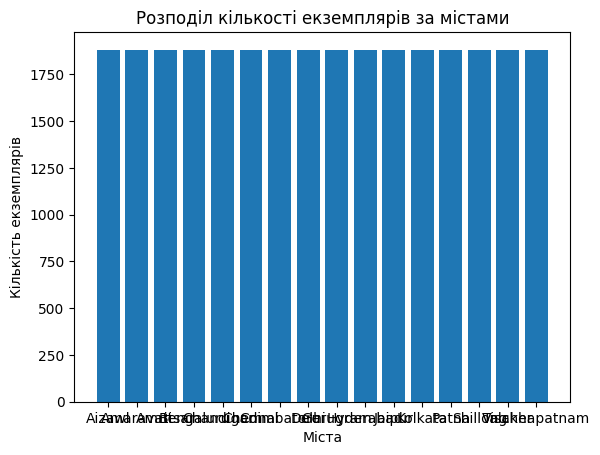

In [395]:
class_counts = y_res.value_counts()

plt.bar(class_counts.index, class_counts.values)

plt.title('Розподіл кількості екземплярів за містами')
plt.xlabel('Міста')
plt.ylabel('Кількість екземплярів')
plt.show()

In [396]:
x_res.shape

(30096, 12)

In [397]:
x_temp = x_res.drop(['AQI'], axis=1)
y_temp = x_res['AQI']

In [398]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_temp, y_temp, test_size=0.1, random_state=42)

In [399]:
cb.fit(x_train_s, y_train_s)

Learning rate set to 0.068953
0:	learn: 79.4903153	total: 8.11ms	remaining: 8.11s
1:	learn: 74.9322884	total: 14.4ms	remaining: 7.18s
2:	learn: 70.7493692	total: 21.1ms	remaining: 7.01s
3:	learn: 66.8131520	total: 27ms	remaining: 6.73s
4:	learn: 63.1696846	total: 32.2ms	remaining: 6.41s
5:	learn: 59.7897354	total: 40.5ms	remaining: 6.72s
6:	learn: 56.6510050	total: 46.1ms	remaining: 6.54s
7:	learn: 53.7942148	total: 52.4ms	remaining: 6.5s
8:	learn: 51.1188348	total: 59.4ms	remaining: 6.54s
9:	learn: 48.6205328	total: 64.6ms	remaining: 6.4s
10:	learn: 46.3288090	total: 71.8ms	remaining: 6.45s
11:	learn: 44.1978704	total: 77.8ms	remaining: 6.41s
12:	learn: 42.1881841	total: 83.3ms	remaining: 6.33s
13:	learn: 40.3655062	total: 91.8ms	remaining: 6.46s
14:	learn: 38.6661214	total: 138ms	remaining: 9.06s
15:	learn: 37.0808711	total: 154ms	remaining: 9.49s
16:	learn: 35.6159536	total: 159ms	remaining: 9.22s
17:	learn: 34.2858893	total: 171ms	remaining: 9.33s
18:	learn: 33.0923094	total: 180ms

22:	learn: 29.1502343	total: 205ms	remaining: 8.69s
23:	learn: 28.3594288	total: 210ms	remaining: 8.55s
24:	learn: 27.5938469	total: 218ms	remaining: 8.51s
25:	learn: 26.9056689	total: 225ms	remaining: 8.42s
26:	learn: 26.2891559	total: 230ms	remaining: 8.28s
27:	learn: 25.7133132	total: 237ms	remaining: 8.22s
28:	learn: 25.1910054	total: 242ms	remaining: 8.1s
29:	learn: 24.7117750	total: 247ms	remaining: 7.99s
30:	learn: 24.2745932	total: 253ms	remaining: 7.9s
31:	learn: 23.8953032	total: 258ms	remaining: 7.82s
32:	learn: 23.5321188	total: 264ms	remaining: 7.73s
33:	learn: 23.1724162	total: 269ms	remaining: 7.64s
34:	learn: 22.8672640	total: 274ms	remaining: 7.57s
35:	learn: 22.5669646	total: 280ms	remaining: 7.5s
36:	learn: 22.3101614	total: 286ms	remaining: 7.44s
37:	learn: 22.0621591	total: 291ms	remaining: 7.38s
38:	learn: 21.8308706	total: 297ms	remaining: 7.31s
39:	learn: 21.6169880	total: 302ms	remaining: 7.25s
40:	learn: 21.4024758	total: 307ms	remaining: 7.18s
41:	learn: 21.2

# Результати, використовуючи SMOTE

In [400]:
pred_s_cb = cb.predict(x_test_s)

In [401]:
metric(pred_s_cb, y_test_s)

MAE = 8.90315727265682
r2 = 0.9685308744579124


In [402]:
xgb.fit(x_train_s, y_train_s)

C:\Users\yura\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:24:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [403]:
pred_s_xgb = xgb.predict(x_test_s)

In [404]:
metric(pred_s_xgb, y_test_s)

MAE = 8.749863152361113
r2 = 0.9648766109041368


In [405]:
scaler_s = MinMaxScaler()

In [406]:
x_res.shape

(30096, 12)

In [407]:
n_cols = x_res.select_dtypes(include=['float64', 'int64']).columns.tolist()
x_res[n_cols] = scaler_s.fit_transform(x_res[n_cols])

In [408]:
x_res.head(4)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,0.044157,0.048263,0.031479,0.007510,0.036336,0.123225,0.018397,0.044604,0.010865,0.000022,0.000176,0.054131
1,0.054649,0.058330,0.031434,0.005294,0.035380,0.140276,0.018725,0.047637,0.000660,0.000000,0.000000,0.065527
2,0.061721,0.063539,0.031208,0.006279,0.035756,0.139262,0.018725,0.048522,0.001552,0.000000,0.000000,0.068376
3,0.047971,0.051238,0.030981,0.001908,0.033197,0.136653,0.015769,0.049785,0.001125,0.000000,0.000000,0.079772


In [409]:
x_temp = x_res.drop(['AQI'], axis=1)
y_temp = x_res['AQI']

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_temp, y_temp, test_size=0.1, random_state=42)

In [410]:
cb.fit(x_train_s, y_train_s)

pred_s_cb = cb.predict(x_test_s)

metric(pred_s_cb, y_test_s)

Learning rate set to 0.068953
0:	learn: 0.1132341	total: 6.43ms	remaining: 6.43s
1:	learn: 0.1067412	total: 12ms	remaining: 5.99s
2:	learn: 0.1007826	total: 17.8ms	remaining: 5.93s
3:	learn: 0.0951754	total: 24.6ms	remaining: 6.14s
4:	learn: 0.0899853	total: 30.2ms	remaining: 6.01s
5:	learn: 0.0851706	total: 35.9ms	remaining: 5.94s
6:	learn: 0.0806994	total: 44ms	remaining: 6.24s
7:	learn: 0.0766299	total: 49.3ms	remaining: 6.11s
8:	learn: 0.0728188	total: 56ms	remaining: 6.16s
9:	learn: 0.0692600	total: 61.4ms	remaining: 6.08s
10:	learn: 0.0659954	total: 66.7ms	remaining: 5.99s
11:	learn: 0.0629599	total: 73.2ms	remaining: 6.03s
12:	learn: 0.0600971	total: 79.7ms	remaining: 6.05s
13:	learn: 0.0575007	total: 85.3ms	remaining: 6.01s
14:	learn: 0.0550799	total: 91.1ms	remaining: 5.98s
15:	learn: 0.0528217	total: 96.7ms	remaining: 5.95s
16:	learn: 0.0507350	total: 103ms	remaining: 5.96s
17:	learn: 0.0488403	total: 109ms	remaining: 5.95s
18:	learn: 0.0471400	total: 115ms	remaining: 5.93s
1

In [411]:
xgb.fit(x_train_s, y_train_s)

pred_s_xgb = xgb.predict(x_test_s)

metric(pred_s_xgb, y_test_s)

C:\Users\yura\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:24:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE = 0.012647116914326788
r2 = 0.9647493936550348
